# Perceptron Algorithm Learning

In [1]:
import random

def show_learning(w):
  print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])


#variables to control training process
random.seed(7)
learning_rate = 0.1
index_list = [0,1,2,3]

#training examples

#inputs
x_train = [(1.0,-1.0,-1.0),(1.0,-1.0,1.0),
          (1.0,1.0,-1.0),(1.0,1.0,1.0)]
#output
y_train = [1.0,1.0,1.0,-1.0]

#perceptron weights
w = [0.2,-0.6,0.25]

show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


In [2]:
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i]  # Compute sum of weighted inputs
    if z < 0:
        return -1
    else:
        return 1

In [3]:
# Perceptron training loop
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list)
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x)  # Predict output

        if y != p_out:
            # Update weights if prediction is incorrect
            for j in range(len(w)):
                w[j] += y * learning_rate * x[j]
            all_correct = False
            show_learning(w)  # Show updated weights

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


w0 =  0.20 , w1 = -0.60 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


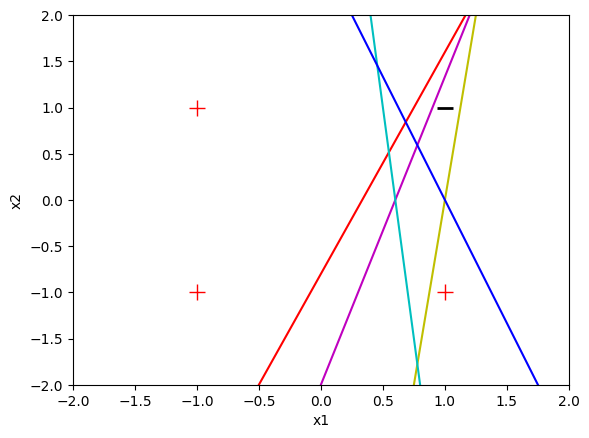

In [4]:
import random
import matplotlib.pyplot as plt

# Define variables needed for plotting
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])

    if color_index == 0:
        # Plot +1 labeled points as blue "+"
        for i in range(len(x_train)):
            if y_train[i] == 1:
                plt.plot(x_train[i][1], x_train[i][2], 'r+', markersize=12)
            else:
                plt.plot(x_train[i][1], x_train[i][2], 'k_', markersize=12, markeredgewidth=2)

        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')

    x = [-2.0, 2.0]

    if abs(w[2]) <= 1e-5:
        y = [
            -w[1] / (1e-5) * (-2.0) + (-w[0] / (1e-5)),
            -w[1] / (1e-5) * (2.0) + (-w[0] / (1e-5))
        ]
    else:
        y = [
            -w[1] / w[2] * (-2.0) + (-w[0] / w[2]),
            -w[1] / w[2] * (2.0) + (-w[0] / w[2])
        ]

    plt.plot(x, y, color_list[color_index])

    if color_index < len(color_list) - 1:
        color_index += 1


# perceptron output function
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i]
    return 1 if z >= 0 else -1

# Initialization
random.seed(7)
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3]

# Training data
x_train = [
    (1.0, -1.0, -1.0),
    (1.0, -1.0,  1.0),
    (1.0,  1.0, -1.0),
    (1.0,  1.0,  1.0)
]
y_train = [1.0, 1.0, 1.0, -1.0]

# Initialize weights
w = [0.2, -0.6, 0.25]
show_learning(w)

# Training loop
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list)

    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x)

        if y != p_out:
            for j in range(len(w)):
                w[j] += y * LEARNING_RATE * x[j]
            all_correct = False
            show_learning(w)
plt.show()


# Building a Neural Network from scratch

In [27]:
import numpy as np

np.random.seed(3)
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3]
# training examples.
x_train = [np.array([1.0, -1.0, -1.0]),
           np.array([1.0, -1.0, 1.0]),
           np.array([1.0, 1.0, -1.0]),
           np.array([1.0, 1.0, 1.0])]
y_train = [0.0, 1.0, 1.0, 0.0]

In [28]:
#Track state of neurons
def neuron_w(input_count):
    weights = np.zeros(input_count+1)
    for i in range(1, (input_count+1)):
        weights[i] = np.random.uniform(-1.0, 1.0)
    return weights

n_w = [neuron_w(2), neuron_w(2), neuron_w(2)]
n_y = [0, 0, 0]
n_error = [0, 0, 0]

In [29]:
def show_learning():
    print('Current weights:')
    for i, w in enumerate(n_w):
        print('neuron ', i, ': w0 =', '%5.2f' % w[0],
              ', w1 =', '%5.2f' % w[1], ', w2 =',
              '%5.2f' % w[2])
    print('----------------')

def forward_pass(x):
    global n_y
    n_y[0] = np.tanh(np.dot(n_w[0], x)) # Neuron 0
    n_y[1] = np.tanh(np.dot(n_w[1], x)) # Neuron 1
    n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
    z2 = np.dot(n_w[2], n2_inputs)
    n_y[2] = 1.0 / (1.0 + np.exp(-z2))

def backward_pass(y_truth):
    global n_error
    error_prime = -(y_truth - n_y[2]) # Derivative of loss-func
    derivative = n_y[2] * (1.0 - n_y[2]) # Logistic derivative
    n_error[2] = error_prime * derivative
    derivative = 1.0 - n_y[0]**2 # tanh derivative
    n_error[0] = n_w[2][1] * n_error[2] * derivative
    derivative = 1.0 - n_y[1]**2 # tanh derivative
    n_error[1] = n_w[2][2] * n_error[2] * derivative

def adjust_weights(x):
    global n_w
    n_w[0] -= (x * LEARNING_RATE * n_error[0])
    n_w[1] -= (x * LEARNING_RATE * n_error[1])
    n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
    n_w[2] -= (n2_inputs * LEARNING_RATE * n_error[2])

In [30]:
# Network training loop.
all_correct = False
while not all_correct:
    all_correct = True
    np.random.shuffle(index_list)
    for i in index_list:
        forward_pass(x_train[i])
        backward_pass(y_train[i])
        adjust_weights(x_train[i])
        show_learning()
    for i in range(len(x_train)):
        forward_pass(x_train[i])
        print('x1 =', '%4.1f' % x_train[i][1], ', x2 =',
              '%4.1f' % x_train[i][2], ', y =',
              '%.4f' % n_y[2])
        if(((y_train[i] < 0.5) and (n_y[2] >= 0.5))
                or ((y_train[i] >= 0.5) and (n_y[2] < 0.5))):
            all_correct = False

Current weights:
neuron  0 : w0 =  0.01 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 =  0.01 , w1 = -0.41 , w2 =  0.01
neuron  2 : w0 =  0.01 , w1 =  0.78 , w2 =  0.79
----------------
Current weights:
neuron  0 : w0 =  0.00 , w1 =  0.12 , w2 =  0.41
neuron  1 : w0 =  0.00 , w1 = -0.40 , w2 =  0.02
neuron  2 : w0 =  0.00 , w1 =  0.79 , w2 =  0.78
----------------
Current weights:
neuron  0 : w0 = -0.00 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 = -0.01 , w1 = -0.41 , w2 =  0.01
neuron  2 : w0 = -0.01 , w1 =  0.78 , w2 =  0.79
----------------
Current weights:
neuron  0 : w0 =  0.00 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 = -0.00 , w1 = -0.42 , w2 =  0.02
neuron  2 : w0 = -0.00 , w1 =  0.78 , w2 =  0.79
----------------
x1 = -1.0 , x2 = -1.0 , y = 0.4811
x1 = -1.0 , x2 =  1.0 , y = 0.6347
x1 =  1.0 , x2 = -1.0 , y = 0.3645
x1 =  1.0 , x2 =  1.0 , y = 0.5179
Current weights:
neuron  0 : w0 =  0.01 , w1 =  0.10 , w2 =  0.42
neuron  1 : w0 =  0.00 , w1 = -0.42 , w2 =  0.02
neuron  2 : w0 =  0.0